In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [11]:
adata=sc.read_h5ad("cortex.h5ad")
adata

AnnData object with n_obs × n_vars = 3005 × 19972
    obs: 'cell_ids', 'label', 'label2'
    var: 'genes'

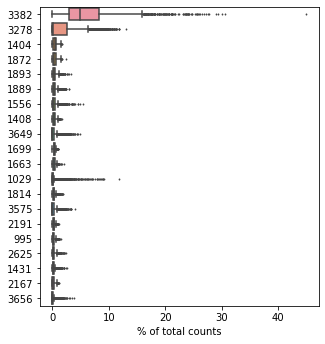

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [13]:
sc.pp.filter_genes(adata, min_cells=30)

In [14]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [15]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)

D:\anaconda\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
sc.pp.log1p(adata)

In [24]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

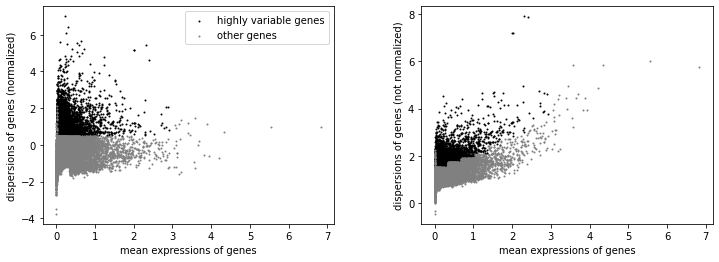

In [25]:
sc.pl.highly_variable_genes(adata)

In [51]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5,inplace=False)

,means,dispersions,mean_bin,dispersions_norm,highly_variable
0,0.334893,1.693420,"(-0.00683, 0.342]",0.912568,True
1,0.406660,1.946552,"(0.342, 0.683]",0.964513,True
2,0.474172,2.213800,"(0.342, 0.683]",1.542388,True
3,0.075838,1.886663,"(-0.00683, 0.342]",1.329753,True
4,0.229682,1.621652,"(-0.00683, 0.342]",0.757631,True
...,...,...,...,...,...
14533,0.685338,1.526232,"(0.683, 1.025]",-0.257282,False
14534,0.035912,0.842173,"(-0.00683, 0.342]",-0.925156,False
14535,0.025232,0.921473,"(-0.00683, 0.342]",-0.753958,False
14536,0.075105,1.068031,"(-0.00683, 0.342]",-0.437560,False


In [38]:
high_variable["dispersions"]

0        1.693420
1        1.946552
2        2.213800
3        1.886663
4        1.621652
           ...   
14533    1.526232
14534    0.842173
14535    0.921473
14536    1.068031
14537    1.343271
Name: dispersions, Length: 14538, dtype: float64

In [44]:
high_data=high_variable["dispersions"].sort_values(ascending=False, inplace=False)

In [47]:
high_data.values[: 100]

array([7.91770134, 7.90483879, 7.21960742, 7.21721542, 6.00491328,
       5.84860255, 5.83616592, 5.77057426, 4.9478832 , 4.93640838,
       4.85737006, 4.74172304, 4.69917518, 4.68077027, 4.66152323,
       4.65941543, 4.6506027 , 4.62906464, 4.61575278, 4.5781349 ,
       4.52129584, 4.51785959, 4.45625901, 4.44523327, 4.43332107,
       4.41937157, 4.39194079, 4.38446151, 4.37097553, 4.27101551,
       4.26193674, 4.25583912, 4.23223332, 4.18557007, 4.16363542,
       4.16281165, 4.14929547, 4.13497935, 4.12785697, 4.12334996,
       4.10450313, 4.09437767, 4.09303677, 4.07689856, 4.05424744,
       4.02859002, 4.02335444, 3.99524202, 3.95344599, 3.952302  ,
       3.94396355, 3.93343193, 3.92659721, 3.87826284, 3.86485732,
       3.84010181, 3.83719127, 3.81827193, 3.80391846, 3.79349671,
       3.76695835, 3.75926876, 3.7466803 , 3.73973622, 3.72903962,
       3.72272653, 3.714671  , 3.69217358, 3.65431983, 3.63204952,
       3.6262747 , 3.62554241, 3.59395706, 3.58822442, 3.58791

In [50]:
high_data.index.values[: 100]

array([ 3464,  3923,  3921,  3922,  3220,  1001,  3339,  3323,  4390,
        4713,  3575,  1512,  3631,  3868,  3620,  3966,  4647,  2155,
        1651,  1290,  3870,  5934,  3502,  4347,  3582,   754,  4394,
        3591,  3740,  4717,  4129,   732,  1000,  3526,  4715,  3867,
        4714,  4397,  1090,  4351,  3927,  1089,  3673,  4081,  3710,
        4219,  3118,  3524,  1847,  3645,  1811,  1843,    52,  4031,
       12133,  3883,  3745,  3616,  3648,  3253,  3232,  3759,  3650,
        3872,  4515,  3862,  3320,  4410,  4046,  3336,  2574,  3619,
         740,  1388,    40,  3787,  3965,  3781,  1432,  4718,  4548,
        4385,  3775,  4126,  3874,  3063,  4140,  3595,  2074,  4493,
        4543,  3637,  4345,  3756,  4312,  3373,  3615,  3675,  3979,
        4336], dtype=int64)